In [229]:
import numpy as np
from sklearn import datasets
import math
import matplotlib.pyplot as plt
import random

iris = datasets.load_iris()

# initialize l
# l=iris.data.shape[1]
k=3
clusters={}

A = np.zeros([iris.data.shape[0],4])
B = np.zeros([iris.data.shape[0],4])
C = np.zeros([iris.data.shape[0],4])

# select k initial random centroid
number_of_rows = iris.data.shape[0]
initial_centroids=np.zeros([k,4])
# print(initial_centroids)
for i in range(k):
    random_indices = np.random.choice(number_of_rows, size=1, replace=False)
    random_row = iris.data[random_indices, :]
    initial_centroids[i]=random_row
print(initial_centroids)

# claculate euclidian distances and update centroids
euclidian_distance=[0,0,0]
for i in range (iris.data.shape[0]) :
    for j in range (k):
        data_point=iris.data[i,:]
        # print(data_point)
        z=(initial_centroids[j,0]-data_point[0]) ** 2 +(initial_centroids[j,1]-data_point[1]) ** 2 +(initial_centroids[j,2]-data_point[2]) ** 2 + (initial_centroids[j,3]-data_point[3]) ** 2
        euclidian_distance[j]=math.sqrt(z)
    # print(euclidian_distance)
    minpos_index = euclidian_distance.index(min(euclidian_distance))
    # print(minpos_index)
    if minpos_index==0:
        A[i,:]=data_point
    
    if minpos_index==1:
        B[i,:]=data_point

    if minpos_index==2:
        C[i,:]=data_point
    
    
   
    count_a=0
    sum_a=0
    count_b=0
    sum_b=0
    count_c=0
    sum_c=0

    if np.any(A):
        for i in range(4):
            for j in range (A.shape[0]):
                count_a=count_a+1
                sum_a=sum_a+A[j,i]
        initial_centroids[0,i]=sum_a/count_a
    
    if np.any(B):
        for i in range(4):
            for j in range (B.shape[0]):
                count_b=count_b+1
                sum_b=sum_b+B[j,i]
        initial_centroids[1,i]=sum_b/count_b
    
    if np.any(C):
        for i in range(4):
            for j in range (C.shape[0]):
                count_c=count_c+1
                sum_c=sum_c+C[j,i]
        initial_centroids[2,i]=sum_c/count_c

A = A[~np.all(A == 0, axis=1)]
B = B[~np.all(B == 0, axis=1)]
C = C[~np.all(C == 0, axis=1)]

print("A")
print(A)
print("B")
print(B)
print("C")
print(C)

clusters=A,B,C
print("clusters")
print(clusters)
total_length=A.shape[0]+B.shape[0]+C.shape[0]
print(total_length)
print(A[1,0])





[[4.9 3.1 1.5 0.2]
 [6.1 2.8 4.7 1.2]
 [5.7 2.8 4.1 1.3]]
A
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3

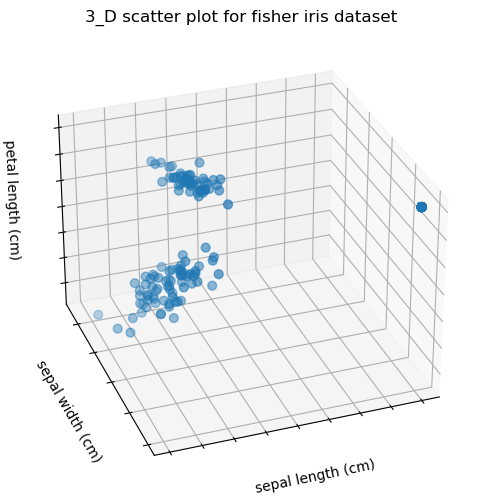

In [244]:
x_index=np.zeros([total_length])
count_x_A=0
for i in range (A.shape[0]):
    x_index[i]=A[i,0]
    count_x_A=count_x_A+1

count_x_B=0
for i in range (B.shape[0]):
    x_index[count_x_A+1+i]=B[i,0]
    count_x_B=count_x_B+1

for i in range (C.shape[0]):
    x_index[count_x_B+1+i]=C[i,0]

y_index=np.zeros([total_length,1])
count_x_A=0
for i in range (A.shape[0]):
    y_index[i]=A[i,1]
    count_x_A=count_x_A+1

count_x_B=0
for i in range (B.shape[0]):
    y_index[count_x_A+1+i]=B[i,1]
    count_x_B=count_x_B+1

for i in range (C.shape[0]):
    y_index[count_x_B+1+i]=C[i,1]

z_index=np.zeros([total_length,1])
count_x_A=0
for i in range (A.shape[0]):
    z_index[i]=A[i,2]
    count_x_A=count_x_A+1

count_x_B=0
for i in range (B.shape[0]):
    z_index[count_x_A+1+i]=B[i,2]
    count_x_B=count_x_B+1

for i in range (C.shape[0]):
    z_index[count_x_B+1+i]=C[i,2]


fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)


scatter=ax.scatter(
    x_index,
    y_index,
    z_index,
    s=40,
)
# ax.legend(
#     scatter.legend_elements()[0], iris.target_names, loc="upper left", title="Classes"
# )

ax.set_title("3_D scatter plot for fisher iris dataset")
ax.set_xlabel(iris.feature_names[0])
ax.xaxis.set_ticklabels([])
ax.set_ylabel(iris.feature_names[1])
ax.yaxis.set_ticklabels([])
ax.set_zlabel(iris.feature_names[2])
ax.zaxis.set_ticklabels([])

plt.show()

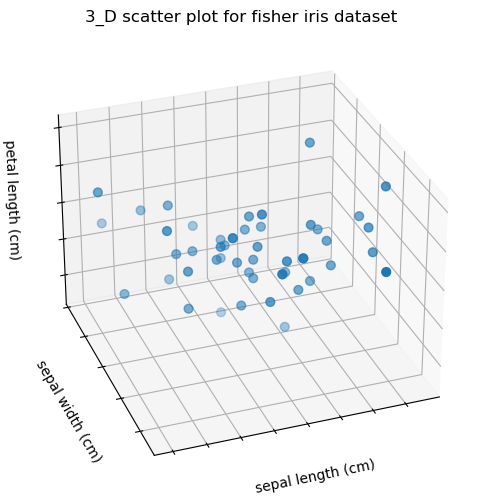

In [232]:
x_index = 0
y_index = 1
z_index= 2

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)


scatter=ax.scatter(
    A[:, x_index],
    A[:, y_index],
    A[:, z_index],
    s=40,
)
# ax.legend(
#     scatter.legend_elements()[0], iris.target_names, loc="upper left", title="Classes"
# )

ax.set_title("3_D scatter plot for fisher iris dataset")
ax.set_xlabel(iris.feature_names[x_index])
ax.xaxis.set_ticklabels([])
ax.set_ylabel(iris.feature_names[y_index])
ax.yaxis.set_ticklabels([])
ax.set_zlabel(iris.feature_names[z_index])
ax.zaxis.set_ticklabels([])

plt.show()

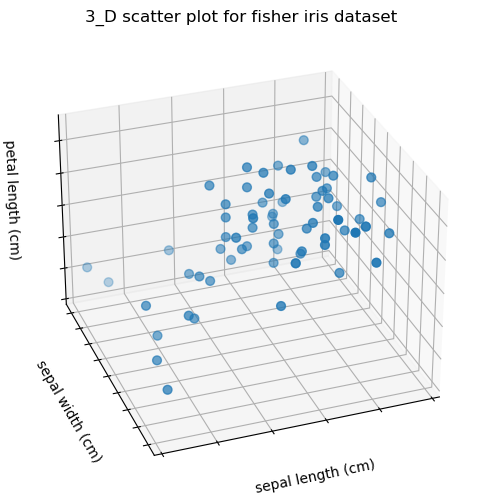

In [233]:
x_index = 0
y_index = 1
z_index= 2

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)


scatter=ax.scatter(
    B[:, x_index],
    B[:, y_index],
    B[:, z_index],
    s=40,
)
# ax.legend(
#     scatter.legend_elements()[0], iris.target_names, loc="upper left", title="Classes"
# )

ax.set_title("3_D scatter plot for fisher iris dataset")
ax.set_xlabel(iris.feature_names[x_index])
ax.xaxis.set_ticklabels([])
ax.set_ylabel(iris.feature_names[y_index])
ax.yaxis.set_ticklabels([])
ax.set_zlabel(iris.feature_names[z_index])
ax.zaxis.set_ticklabels([])

plt.show()

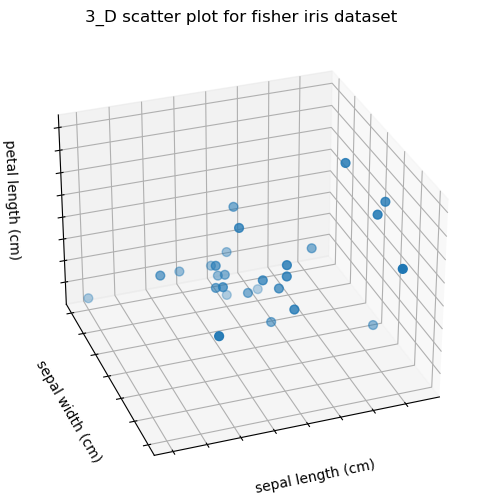

In [234]:
x_index = 0
y_index = 1
z_index= 2

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)


scatter=ax.scatter(
    C[:, x_index],
    C[:, y_index],
    C[:, z_index],
    s=40,
)
# ax.legend(
#     scatter.legend_elements()[0], iris.target_names, loc="upper left", title="Classes"
# )

ax.set_title("3_D scatter plot for fisher iris dataset")
ax.set_xlabel(iris.feature_names[x_index])
ax.xaxis.set_ticklabels([])
ax.set_ylabel(iris.feature_names[y_index])
ax.yaxis.set_ticklabels([])
ax.set_zlabel(iris.feature_names[z_index])
ax.zaxis.set_ticklabels([])

plt.show()